<a href="https://colab.research.google.com/github/bongkyunSON/A1_performance_factory_Aveners/blob/main/A1_project_EDA_230111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Project/data/A1/'
log = pd.read_csv(base_path + 'log_csv.csv')
bidding = pd.read_csv(base_path + 'bidding_results.csv')

In [ ]:
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


action_type은 해당 유저가 한 행동을 의미합니다.

 - 유저가 하는 행동중 추적 가능한 행동은 
 - ‘View', 'Basket', 'Highlight', 'Copy', 'SINF'
 - View : 페이지 방문
 - Basket : 장바구니 버튼 
 - Highlight : 드래그 이벤트 발생 
 - Copy:  복사 이벤트 발생
 - SINF : 광고 유입을 통한 입장

Viewrate는 유저가 페이지에서 확인한 내용들을 의미

viewtime은 유저가 페이지에 머문 시간을 의미합니다 (단위 ms)



bidding_result.csv 파일은 해당 이커머스 사이트에 대한 온라인 광고 집행 내역드리며

12월 22일 부터 24일 데이터 같은 경우는 빠져있음을 알려드립니다. (원래 공유 드리고 싶었던 데이터)

**저희가 데이터 마다 주목하는 부분이 조금씩 다른데.**



 우선 로그 데이터에서는 (log_csv)

 - 로그 데이터 정리 및 uid에 따른 각종 지표 정리 및 대시보드 구축 
 - 예시 : DAU, Active User, 퍼널 분석 
 - 데이터를 통한 유저 인사이트 제공 및 새로운 기획전 구축 전략 수립 

bidding_result에서는 

 - 목표된 예산 카테고리별, 고유 index 별 클릭 최적화 로직 구성 -> log.csv 파일도 같이  이용
 - 일 예산 (100만원)
 - 입찰 결과를 종합할수 있는 대시보드 

### ***bidding_result_추가데이터***

| 데이터 열 | 데이터 설명 | 비고  |
| --- | --- | --- |
| Index | 광고 고유 이름( All 숫자) | int64  |
| Impression | 노출수 ***** 라벨링 값(feat. 성민규강사님) | int64  |
| Click | 클릭수 ***** 라벨링 값(feat. 성민규강사님) | int64  |
| Cost | 광고 집행 비용; bid * 클릭수(세금제외) | float64 |
| Sum of AD rank | 전일 광고 평균 순위 | float64 |
| ON/OFF | 광고 켜짐/꺼짐(0: on, 1: off) | int64  |
| Bid | 광고 단가 | int64  |
| Price(PC)   | PC 가격 *** ; 판매중인 물건 가격 | int64  |
| Price(Mobile)  | 모바일 가격 ***; 판매중인 물건 가격 | int64  |
| Delivery Fee | 배송비(부정확함) | int64  |
| Category1 | 범주1 | object |
| Category2 | 범주2 | object |
| Category3 | 범주3 | object |
| Category4 | 범주4 | object |
| date | 날짜 | int64  |
|  |  |  |

### **log_csv**

| 데이터 열 | 데이터 설명 | 비고 |
| --- | --- | --- |
| uid | 고유의 값_유저 식별을 위한 인덱스 (동일 아이디일때 같은 유저라고 파악 | object |
| action_type | 해당 유저가 한 행동                                                                     -유저가 하는 행동중 추적 가능한 행동-
1. View : 페이지 방문
2. Basket : 장바구니 버튼
3. Highlight : 드래그 이벤트 발생 
4. Copy:  복사 이벤트 발생
5. SINF : 광고 유입을 통한 입장 | object |
| category1 | 범주1 | object |
| category2 | 범주2 | object |
| category3 | 범주3 | object |
| collect_time | 수집 시간 | object |
| geoip_city_name | 유저 ip기반으로 추측하는 대략적 위치 정보 | object |
| useragent_os | 유저가 사용하는 기기 정보 | object |
| viewrate | 유저가 페이지에서 확인한 내용 | float64 |
| viewtime | 유저가 페이지에 머문 시간을 의미합니다 (단위 ms) | int64 |

# log EDA

In [ ]:
print('Features:', log.shape[1], ';', 'Entries:', log.shape[0])

Features: 11 ; Entries: 5659541


In [ ]:
# 데이터 갯수 보기
def descriptive_info(log):
    number_of_cells = log.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', log.describe())

In [ ]:
descriptive_info(log)

Total number of cells the datafile has: 
Unnamed: 0         5659541
uid                5473228
action_type        5659541
category1          5659541
category2          5659541
category3          4879535
collect_time       5659541
geoip_city_name    5242509
useragent_os       5659541
viewrate           5657112
viewtime           5659541
dtype: int64


Printing descriptive statistics...

          Unnamed: 0      viewrate      viewtime
count  5.659541e+06  5.657112e+06  5.659541e+06
mean   2.829770e+06  7.677686e+01  5.126022e+04
std    1.633769e+06  4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.414885e+06  1.000000e+02  8.940000e+02
50%    2.829770e+06  1.000000e+02  1.010400e+04
75%    4.244655e+06  1.000000e+02  4.800500e+04
max    5.659540e+06  1.000000e+02  8.636989e+07


In [ ]:
# 날짜 데이터 테이트타임으로 바꾸기
def _trans_date_time(log):
    log.index = pd.to_datetime(log['collect_time'], infer_datetime_format=True)
    log.drop('collect_time', axis=1, inplace=True)
    return log

In [ ]:
_trans_date_time(log)

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0
2022-12-29 17:11:30,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,Seoul,iOS,100.0,947
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
2022-12-28 20:01:30,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,Seoul,Android,100.0,13893
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0
2022-12-29 12:45:13,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,Gunpo,Android,100.0,47217


## 결측치 처리

In [ ]:
# null값 퍼센트로 보기
(log.isnull().sum()/ log.shape[0]).sort_values(ascending=False)

category3          0.137821
geoip_city_name    0.073687
uid                0.032920
viewrate           0.000429
Unnamed: 0         0.000000
action_type        0.000000
category1          0.000000
category2          0.000000
useragent_os       0.000000
viewtime           0.000000
dtype: float64

In [ ]:
# null값 보기
log.isnull().sum().sort_values(ascending=False)

category3          780006
geoip_city_name    417032
uid                186313
viewrate             2429
Unnamed: 0              0
action_type             0
category1               0
category2               0
useragent_os            0
viewtime                0
dtype: int64

In [ ]:
"""
0으로 채우기 
category는 세분화 하면서 세분화 안될수있기 때문에 없음으로 채우고
geoip_city_name 위치를 알 수 없는 곳에서 feature importance에 영향력을 줄 수 있기 때문에 drop
uid는 회원가입이 안되어있는 회원으로 인식하여 회원가입 안하는 회원들은 어떤 상품을 볼수있기 때문에 unname으로 채우기
viewrate는 비중이 작기 때문에 날리기
"""

log2 = log.copy()
log2['category3'].fillna('uncategory', inplace = True)
log2['uid'].fillna('unname', inplace = True)
log2.dropna(axis = 0, inplace = True)
print(log2.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현
log2

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0
2022-12-29 17:11:30,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,Seoul,iOS,100.0,947
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
2022-12-28 20:01:30,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,Seoul,Android,100.0,13893
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0
2022-12-29 12:45:13,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,Gunpo,Android,100.0,47217


In [ ]:
"""
unname에 특별한 특징은 보이지 않는다
"""

log2_uname = log2[log2['uid'] == 'unname']
log2_uname['category1'].value_counts()

가구                         49179
가전·디지털                     29188
패브릭                        15506
데코·식물                      15023
주방용품                       12225
수납·정리                       8758
생활용품                        7189
노하우                         6814
유아·아동                       5987
공구·DIY                      4696
조명                          3599
캠핑용품                        3021
반려동물                        2807
생필품                         1959
식품                           865
실내운동                         704
인테리어시공                       438
렌탈                           165
핀카                             7
보니애가구                          2
织物                             1
프리미엄                           1
Декор растение                 1
Home Appliances Digital        1
Đồ gia dụng Kỹ thuật số        1
가전                             1
피카소가구                          1
묶음배송 상품                        1
Name: category1, dtype: int64

## view 컬럼들의 특징 살표보기

In [ ]:
"""
뷰레이트가 100일때는 액션타입이 뷰만 체크된다
전체 로그에서 보다 뷰가 0일때 하이라이트와 바스켓 비중이 높다

"""

log2_view_zero = log2[log2['viewrate'] == 0]
log2_view_zero = log2_view_zero[log2_view_zero['viewtime'] == 0]
log2_view_nonzero = log2[log2['viewrate'] > 0]
log2_view_nonzero = log2_view_nonzero[log2_view_nonzero['viewtime'] > 0]

print('전체 로그')
print(log2['action_type'].value_counts(normalize=True, ascending=False))
print('\n')
print('뷰레이트 100')
print(log2_view_nonzero['action_type'].value_counts(normalize=True, ascending=False))
print('\n')
print('뷰타입 제로')
print(log2_view_zero['action_type'].value_counts(normalize=True, ascending=False))
print('-' * 30)
print('\n', '\n')
print('전체 로그')
print(log2['action_type'].value_counts(ascending=False))
print('\n')
print('뷰레이트 100')
print(log2_view_nonzero['action_type'].value_counts(ascending=False))
print('\n')
print('뷰레이트 제로')
print(log2_view_zero['action_type'].value_counts(ascending=False))



전체 로그
View         0.868890
Highlight    0.078463
Basket       0.029326
Copy         0.018373
SINF         0.004948
Name: action_type, dtype: float64


뷰레이트 100
View    1.0
Name: action_type, dtype: float64


뷰타입 제로
View         0.434602
Highlight    0.338363
Basket       0.126466
Copy         0.079231
SINF         0.021338
Name: action_type, dtype: float64
------------------------------

 

전체 로그
View         4553181
Highlight     411166
Basket        153676
Copy           96278
SINF           25929
Name: action_type, dtype: int64


뷰레이트 100
View    4024826
Name: action_type, dtype: int64


뷰레이트 제로
View         528112
Highlight    411166
Basket       153676
Copy          96278
SINF          25929
Name: action_type, dtype: int64


In [ ]:
log2_view_zero['useragent_os'].value_counts()

Windows      655008
Android      262552
iOS          239093
Mac OS X      55862
Linux          1921
CentOS          285
Other           214
Chrome OS       158
Ubuntu           57
Tizen             8
FreeBSD           3
Name: useragent_os, dtype: int64

뷰라는 컬럼들은 해석이 필요한것같다....
뷰레이트가 100일때 뷰만 체크되길래
데스크탑으로 접속했을때만 체크되는줄 알았는데 그것도 아니다...
음...우선 해석이 필요할듯?

## category 컬럼들의 특징 보기

In [ ]:
# 카테고리3의 nan값들의 특징은 뷰가 89%이다
log2_ct3_uncat = log2[log2['category3'] == 'uncategory']
print(log2_ct3_uncat['action_type'].value_counts())
print(log2_ct3_uncat['action_type'].value_counts(normalize=True)) 

View         647084
Highlight     58828
Copy           6216
Basket         6165
SINF            798
Name: action_type, dtype: int64
View         0.899864
Highlight    0.081809
Copy         0.008644
Basket       0.008573
SINF         0.001110
Name: action_type, dtype: float64


In [ ]:
categorys = list(set(log2['category1'].to_list()))
print(len(categorys))
print(categorys)
categorys2 = list(set(log2['category2'].to_list()))
print(len(categorys2))
print(categorys2)
categorys3 = list(set(log2['category3'].to_list()))
print(len(categorys3))
print(categorys3)

3244
['쓰임목공방', '써모스', '장미연립', '베이직톤', '어반휴', '가누', '슈톨츠', '슬라이락', '364days', '수풀', '파이렉스', '그레이맨션', '까사인루체', 'FRITZ HANSEN', '아쿠아릭', '生活用品', '비에스', 'home appliances and digital', '집드리', '엠컴퍼니', '모벨퍼니', '챈초이', '글로잉컬러', '닌샵', 'ESSA', '이브자리', '룸핏', 'opertum', 'UFO', '핸드메이드썸', '수요연차', '식스티세컨즈', '와이엘이디', 'peralatan dapur', '린백', '릴렉스', '시몬스', '프로라이팅', '글로리가구', '슈나츠', '다니카', '데코그램', '진목가구', '캐럿마켓', '살림의발견', '비콤마디', '裝飾 植物', '아토소', '피콕서울', '까사밀라', 'ضوء', '싱글맨션', '데미무드', '슬리머', '베누지오', '레이트', 'wallace & sewell', '데코앤비', '나눔조명', '유한양행', '인블루가구', '향목점', '티에스퍼니처', '예닮', '리큐엠', 'KAR STUDIO', '벤키즈', '리피트리', '한경희', '마리헤즈', '더 페레헤 테이블', '이플', '더허브샵', '퍼니인어스', '하루의 공간', '로이첸', '크림펫', '씨에스리빙', '삼성', '쟈뎅드에덴', '동서식품', '뉴엔', '레벤데코', '오덴세', '베베앙 아기물티슈', '이케아', '쎄마비', '유캐슬', '반디몰', '러그마켓', '디얼리빙', '婴儿 儿童', '마이루미', 'DDWD', '마키나랩', '르파르페', '자연일상', '핀블랑', '오우프', '스튜디오 리포소', '오투가구', '휘게체어', 'OMT', '어퍼테이블', '윈드피아', '시라쿠스', '아츠리프', '스칸디앤홈', '고트레', '에이블밤부', '토파즈하우스', '베가스잡화점', '샤토에르', '프로쉬', '달콤패브릭', '미니멀룸', '벨루스퍼

In [ ]:
categorys_nonzero = list(set(log2_view_nonzero['category1'].to_list()))
print(len(categorys_nonzero))
print(categorys_nonzero)
categorys2_nonzero = list(set(log2_view_nonzero['category2'].to_list()))
print(len(categorys2_nonzero))
print(categorys2_nonzero)
categorys3_nonzero = list(set(log2_view_nonzero['category3'].to_list()))
print(len(categorys3_nonzero))
print(categorys3_nonzero)

3238
['쓰임목공방', '써모스', '장미연립', '베이직톤', '어반휴', '가누', '슈톨츠', '슬라이락', '364days', '수풀', '파이렉스', '그레이맨션', '까사인루체', 'FRITZ HANSEN', '아쿠아릭', '生活用品', '비에스', 'home appliances and digital', '집드리', '엠컴퍼니', '모벨퍼니', '챈초이', '글로잉컬러', '닌샵', 'ESSA', '이브자리', '룸핏', 'opertum', 'UFO', '핸드메이드썸', '수요연차', '식스티세컨즈', '와이엘이디', 'peralatan dapur', '린백', '릴렉스', '시몬스', '프로라이팅', '글로리가구', '슈나츠', '다니카', '데코그램', '진목가구', '캐럿마켓', '살림의발견', '비콤마디', '裝飾 植物', '아토소', '피콕서울', '까사밀라', 'ضوء', '싱글맨션', '데미무드', '슬리머', '베누지오', '레이트', 'wallace & sewell', '데코앤비', '나눔조명', '유한양행', '인블루가구', '향목점', '티에스퍼니처', '예닮', '리큐엠', 'KAR STUDIO', '벤키즈', '리피트리', '한경희', '마리헤즈', '더 페레헤 테이블', '이플', '더허브샵', '퍼니인어스', '하루의 공간', '로이첸', '크림펫', '씨에스리빙', '삼성', '쟈뎅드에덴', '동서식품', '뉴엔', '레벤데코', '오덴세', '베베앙 아기물티슈', '이케아', '쎄마비', '유캐슬', '반디몰', '러그마켓', '디얼리빙', '婴儿 儿童', '마이루미', 'DDWD', '마키나랩', '르파르페', '자연일상', '핀블랑', '오우프', '스튜디오 리포소', '오투가구', '휘게체어', 'OMT', '어퍼테이블', '윈드피아', '시라쿠스', '아츠리프', '스칸디앤홈', '고트레', '에이블밤부', '토파즈하우스', '베가스잡화점', '샤토에르', '프로쉬', '달콤패브릭', '미니멀룸', '벨루스퍼

In [ ]:
categorys_zero = list(set(log2_view_zero['category1'].to_list()))
print(len(categorys_zero))
print(categorys_zero)
categorys2_zero = list(set(log2_view_zero['category2'].to_list()))
print(len(categorys2_zero))
print(categorys2_zero)
categorys3_zero = list(set(log2_view_zero['category3'].to_list()))
print(len(categorys3_zero))
print(categorys3_zero)

846
['메이크가구', '몬즈', '베이직톤', '도모디자인', '시나몬샵', '헝키도리', '스피드랙', 'kitchen appliances', 'YC PLUS', '마루이', '퍼핑', '브릭나인', '웰퍼니쳐', '럼멜', '우드레이', '비페이퍼', '위띵크', 'FRITZ HANSEN', '고르소', '리비니아', '상도가구', '씰리', '비에스', '해피콜', '아워무르', '코지마', '비다하우스', '퍼니하우스', 'JAJU(자주)', '엠컴퍼니', 'Pengetahuan ', '우아미가구', '비비홈', '플랜룩스', '키모스리빙', '위드퍼니처', '룸핏', '라로퍼니처', 'ZIBE', '두닷모노', '인틴트', '솔러스에어', '서광퍼니처', '벨라홈', '리빙숲', '파나소닉', '김용석생활연구소', '채움가구', '크로노', '양키캔들', '우드리퍼블릭', '우리집풍경', '반려동물', '주앤지', 'Home Appliances Digital', '이니띠움', '裝飾 植物', '비콤마디', '라샘', '리베르떼', '가본조명', '메이드모드', '메가맥타일즈', '살림의기술', '데미무드', '나눔조명', '가담다', '플라망', '伴侶動物', '티에스퍼니처', '데코뷰', '가구밸리', '2uc', '미니모', '플라워트리', '리피트리', '더 페레헤 테이블', '보니애가구', '잇츠라이팅', 'HAEGANG', '하우스플랜', '装饰、植物', '소년과나무', '메나르', '아늑', '에덴미술', '오덴세', '시스디자인', '이케아', '쎄마비', '유캐슬', '퍼스웰', '메종오브제', '디얼리빙', '데코룸', 'daily necessity', '케어퍼니처', '스윗브릿지', '專有技術', '르파르페', '남다른홈앤키친', '에이트하우스', '나인웨어', '이지철물', '쥬앤크홈', '라라홈', '스튜디오 리포소', '오투가구', '먼데이하우스', '오트밀하우스', '存儲、組織', 'OMT', '스파이더락', '시라쿠스',

카테고리는 정말 많다
특별한 특징을 찾기는 힘들것같다
카테고리3에서 결측치가 있는것들은 뷰가89%인것
뷰가 제로일때 카테고리 수가 조금 적다는것
근데 이것이 큰 특징인지는 모르겠다

In [ ]:
log3 = log2.copy()
log3["viewtime_hour"] = log3["viewtime"] * 1/1000 / 60 / 60
log4 = log3[log3['viewtime_hour'] > 0]
log4 = log4.sort_values(by = ['viewtime_hour'], ascending=False)
log4 = log4.iloc[:100, :]
log4

In [ ]:
log5 = pd.DataFrame(log4['geoip_city_name'].value_counts())
log5


,geoip_city_name
Seoul,683580
Daegu,160397
Incheon,152973
Busan,149685
Seongnam-si,143339
...,...
Oropesa del Mar,1
Roubaix,1
Gravataí,1
Iruma,1


In [ ]:
log5 = pd.DataFrame(log4['geoip_city_name'].value_counts())
log5.rename(columns = {'index' : 'city_name', 'geoip_city_name' : 'oder'}, inplace=True)
log6 = log5.iloc[:100].reset_index()
viewtime_hour = log4.iloc[:100].reset_index()
viewtime_hour = viewtime_hour[['viewtime_hour']]
log6['viewtime_hour'] = viewtime_hour
log6

,index,oder,viewtime_hour
0,Seoul,683580,23.991635
1,Daegu,160397,23.967646
2,Incheon,152973,23.967363
3,Busan,149685,23.967184
4,Seongnam-si,143339,23.908320
...,...,...,...
95,Yeongcheon-si,5498,18.048505
96,Suseong-gu,5205,18.043570
97,Tangjin,5181,18.014727
98,Seogwipo,5010,17.886872


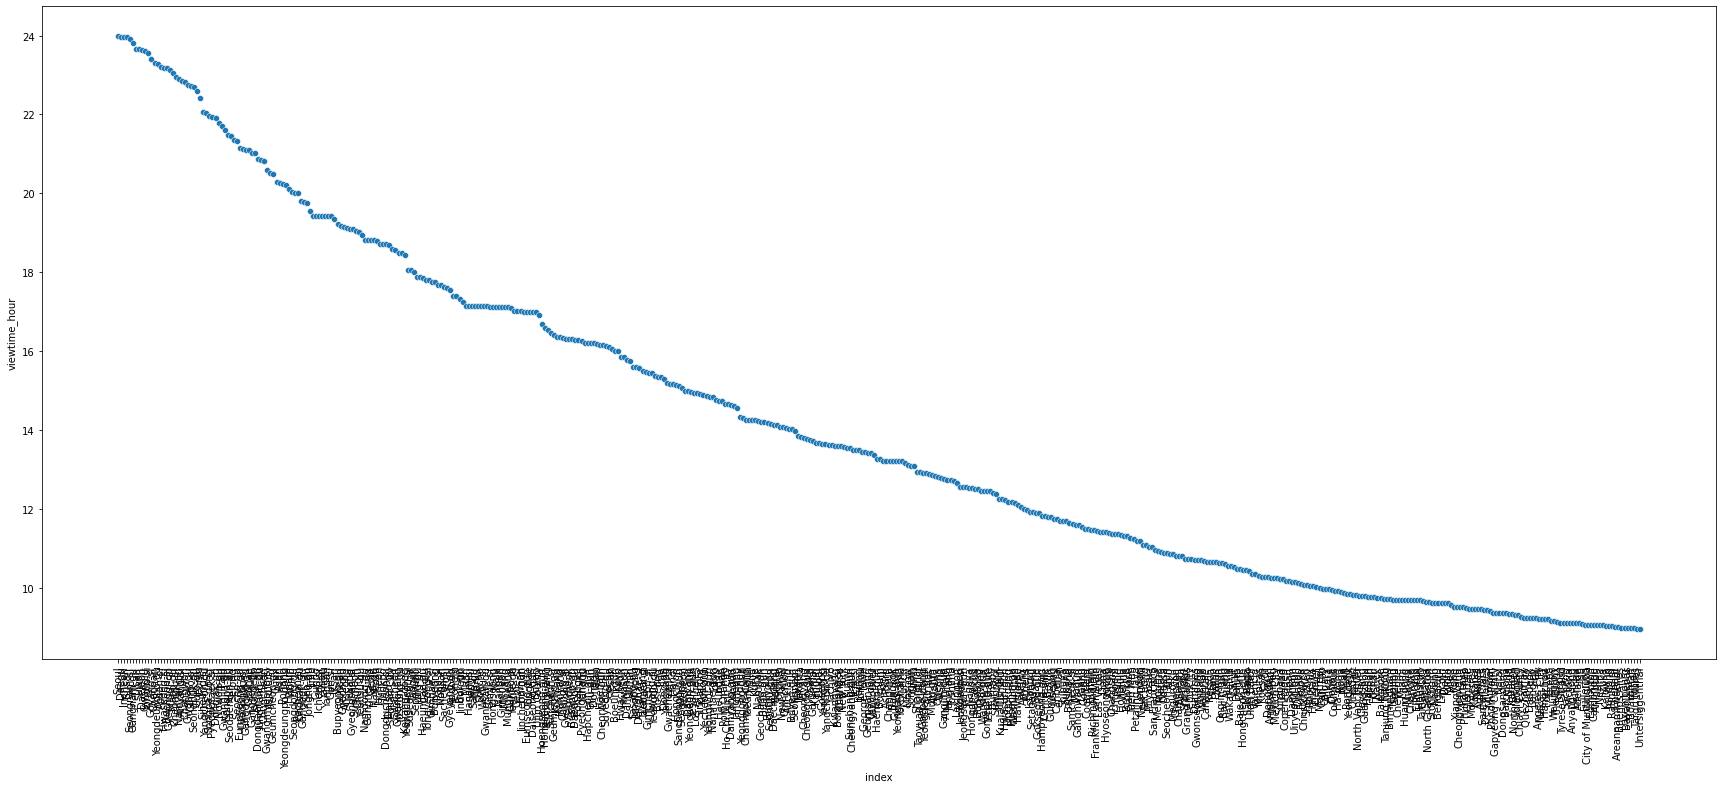

In [ ]:
plt.figure(figsize=(30, 12))
sns.scatterplot(data=log6, y='viewtime_hour', x='index', ci=None)
plt.xticks(rotation=90)
plt.show()

# Bidding EDA

In [ ]:
print('Features:', bidding.shape[1], ';', 'Entries:', bidding.shape[0])

Features: 14 ; Entries: 1337088


In [ ]:
descriptive_info(bidding)

Total number of cells the datafile has: 
index              1337088
Impression         1337088
Click              1337088
Cost               1337088
Sum of AD rank     1337078
Bid                1337088
Price(PC)          1337088
Price(Mobile)      1337088
Delivery Fee       1337088
Category Name 1    1337088
Category Name 2    1337088
Category Name 3    1331221
Category Name 4     930132
date               1337088
dtype: int64


Printing descriptive statistics...

               index    Impression         Click          Cost  Sum of AD rank  \
count  1.337088e+06  1.337088e+06  1.337088e+06  1.337088e+06    1.337078e+06   
mean   5.167098e+06  4.412753e+01  7.189467e-01  1.800053e+02    1.138271e+01   
std    2.655813e+06  3.434510e+02  3.423456e+00  1.772706e+03    1.323231e+01   
min    2.578600e+04  0.000000e+00  0.000000e+00  0.000000e+00    1.000000e+00   
25%    3.300168e+06  3.000000e+00  0.000000e+00  0.000000e+00    3.706897e+00   
50%    4.637081e+06  1.000000e+01  0.000000

In [ ]:
bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [ ]:
bidding2 = bidding.copy()

In [ ]:
bidding2

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


In [ ]:
# 날짜 데이터 테이트타임으로 바꾸기
def _trans_date_time(bidding):
    bidding.index = pd.to_datetime(bidding['date'], format='%Y%m%d')
    bidding.drop('date', axis=1, inplace=True)
    return bidding

In [ ]:
_trans_date_time(bidding)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4
date,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN


In [ ]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4
date,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN


In [ ]:
# CTR = 클릭률
# CPC = 클릭당 비용
# CPM = 1000회 노출당 비용
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)

## 결측치 처리

In [ ]:
# null값 퍼센트로 보기
(bidding.isnull().sum()/ bidding.shape[0]).sort_values(ascending=False)

CPC                0.753309
Category Name 4    0.304360
Category Name 3    0.004388
Sum of AD rank     0.000007
index              0.000000
Impression         0.000000
Click              0.000000
Cost               0.000000
Bid                0.000000
Price(PC)          0.000000
Price(Mobile)      0.000000
Delivery Fee       0.000000
Category Name 1    0.000000
Category Name 2    0.000000
CTR                0.000000
CPM                0.000000
dtype: float64

In [ ]:
"""
Category Name 3, Sum of AD rank 는 결측치 자료가 적어서 drop한다
CPC의 결측치는 우선 0 으로 처리하고 다른 EDA를 해본다

"""

bidding2 = bidding.copy()
bidding2['Category Name 4'].fillna('uncategory', inplace = True)
bidding2['CPC'].fillna(0, inplace = True)
bidding2.dropna(axis = 0, inplace = True)
print(bidding2.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현
bidding2

index              0
Impression         0
Click              0
Cost               0
Sum of AD rank     0
Bid                0
Price(PC)          0
Price(Mobile)      0
Delivery Fee       0
Category Name 1    0
Category Name 2    0
Category Name 3    0
Category Name 4    0
CTR                0
CPC                0
CPM                0
dtype: int64


,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,uncategory,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,uncategory,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,uncategory,0.000000,0.0,0.00


## 같은 인덱스가 있는지 찾아보기(회원별)

In [ ]:
# 48486명 회원
indexs = list(set(bidding2['index'].to_list()))
print(len(indexs))

48486


In [ ]:
bidding3 = bidding2.drop_duplicates(['index'])
bidding3

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,uncategory,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,uncategory,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,uncategory,0.000000,0.0,0.00


In [ ]:
categorys1 = list(set(bidding3['Category Name 1'].to_list()))
categorys2 = list(set(bidding3['Category Name 2'].to_list()))
categorys3 = list(set(bidding3['Category Name 3'].to_list()))
categorys4 = list(set(bidding3['Category Name 4'].to_list()))
print(categorys1)
print(categorys2)
print(categorys3)
print(categorys4)

['화장품/미용', '생활/건강', '출산/육아', '가구/인테리어', '여가/생활편의', '패션잡화', '패션의류', '식품', '스포츠/레저', '디지털/가전']
['여성언더웨어/잠옷', '낚시', '솜류', '등산', '태블릿PC액세서리', '구강청결용품', '수예', '악기', '유아동잡화', '안마용품', '유아세제', '네트워크장비', '수유용품', '스킨케어', '자전거', '발건강용품', '음반', '기저귀', '침구단품', '네일케어', '수납가구', '거실가구', '캠핑', '인형', '임산부용품', '아동/주니어가구', '건강식품', '원예/식물', '보호용품', '홈케어서비스', '유아동 주얼리', 'PC액세서리', '아웃도어가구', '위생/건강용품', '반려동물', '남성화장품', '마스크/팩', '청소용품', '인테리어소품', '유모차', '생활용품', '헤어케어', '권투', '의료용품', '출산/돌기념품', '여행용가방/소품', '침실가구', '관상어용품', '분유', '세탁용품', '국내여행/체험', '카시트', '선글라스/안경테', '욕실용품', '눈건강용품', '카페트/러그', '목욕용품', '홈데코', '물리치료/저주파용품', '바디케어', '뷰티소품', '여성가방', '유아가구', '양말', 'DVD', '베이스메이크업', '남성의류', '침구세트', '이유식용품', '안전용품', '커튼/블라인드', '헬스', '해외여행', '지갑', '화방용품', '재활운동용품', '헤어스타일링', '물티슈', '수집품', '스포츠액세서리', '유아발육용품', '남성언더웨어/잠옷', '완구/매트', '스킨/바디용품', '수영', '음료', '주방가구', '외출용품', '여성신발', '농산물', '패션소품', '소독/살균용품', '모니터주변기기', '여성의류', '스키/보드', '요가/필라테스', '주얼리', '정원/원예용품', '건강측정용품', '수납/정리용품', '향수', '색조메이크업', '문구/사무용품', '좌욕/좌훈용품', '신생

In [ ]:
# CTR = 클릭률
# CPC = 클릭당 비용
# CPM = 1000회 노출당 비용
for cate in categorys1:
    df = bidding3.loc[bidding3['Category Name 1'] == cate]
    print(f"CTR : {cate}: {df['CTR'].mean()}")
print('-' * 50)
for cate in categorys1:
    df = bidding3.loc[bidding3['Category Name 1'] == cate]
    print(f"CPC : {cate}: {df['CPC'].mean()}")
print('-' * 50)
for cate in categorys1:
    df = bidding3.loc[bidding3['Category Name 1'] == cate]
    print(f"CPM : {cate}: {df['CPM'].mean()}")
print('-' * 50)

CTR : 화장품/미용: 1.2639134068914868
CTR : 생활/건강: 1.816915281585836
CTR : 출산/육아: 2.3485914213997328
CTR : 가구/인테리어: 1.534402497955175
CTR : 여가/생활편의: 4.306358289042499
CTR : 패션잡화: 1.7142804235347056
CTR : 패션의류: 1.1696922649345287
CTR : 식품: 0.0
CTR : 스포츠/레저: 2.473615329335076
CTR : 디지털/가전: 1.916043896440929
--------------------------------------------------
CPC : 화장품/미용: 65.26291993796862
CPC : 생활/건강: 56.909235795186234
CPC : 출산/육아: 52.6338680538919
CPC : 가구/인테리어: 47.029295871442436
CPC : 여가/생활편의: 38.62139917695473
CPC : 패션잡화: 68.05678756462889
CPC : 패션의류: 92.61124449779913
CPC : 식품: 0.0
CPC : 스포츠/레저: 61.13637438132432
CPC : 디지털/가전: 32.55504258551301
--------------------------------------------------
CPM : 화장품/미용: 0.2642524916943521
CPM : 생활/건강: 0.21437473251733288
CPM : 출산/육아: 0.2678363832077503
CPM : 가구/인테리어: 0.15693206592831607
CPM : 여가/생활편의: 0.19740740740740742
CPM : 패션잡화: 0.17357933579335794
CPM : 패션의류: 0.5751260504201681
CPM : 식품: 0.0
CPM : 스포츠/레저: 0.3193262411347518
CPM : 디지털/가전: 0.154

- 회원별로 봤을때 패션의류, 잡화 쪽에 클릭당 비용과 노출당 비용이 높지만 클릭률이 높지는 않다
- 식품은 그냥 0
- 클릭률은 여가/생활편의가 가장높지만 2가지 비용은 그리 높지 않다
- 출산/육아 쪽도 클릭률이 높다. 2가지 비용도 그렇게 높지 않다
- 재미있는 특징들이 많다


In [ ]:
bidding4 = bidding3[bidding3['Cost'] > 0]
bidding4

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,uncategory,8.333333,50.000000,0.15
2022-10-31,4158472,138,2,270.0,4.420290,240,129000,129000,0,가구/인테리어,아동/주니어가구,책장,uncategory,1.449275,135.000000,0.27
2022-10-31,4159062,60,1,50.0,10.366667,50,699000,699000,0,가구/인테리어,아동/주니어가구,책상,uncategory,1.666667,50.000000,0.05
2022-10-31,4159066,76,3,640.0,5.421053,250,149000,149000,0,가구/인테리어,아동/주니어가구,책상,uncategory,3.947368,213.333333,0.64
2022-10-31,4159664,170,2,200.0,2.811765,230,359000,359000,-1,가구/인테리어,침실가구,침대,침대프레임,1.176471,100.000000,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2564155,5,1,190.0,14.800000,50,98900,98900,-1,가구/인테리어,침실가구,침대,침대프레임,20.000000,190.000000,0.19
2023-01-03,2564724,39,1,250.0,2.743590,500,6900,6900,3000,화장품/미용,바디케어,핸드케어,uncategory,2.564103,250.000000,0.25
2023-01-03,2566230,85,2,860.0,1.611765,500,36800,36800,0,생활/건강,욕실용품,수건/타월,세면타월,2.352941,430.000000,0.86


In [ ]:
# CTR = 클릭률
# CPC = 클릭당 비용
# CPM = 1000회 노출당 비용
for cate in categorys1:
    df = bidding4.loc[bidding4['Category Name 1'] == cate]
    print(f"CTR : {cate}: {df['CTR'].mean()}")
print('-' * 50)
for cate in categorys1:
    df = bidding4.loc[bidding4['Category Name 1'] == cate]
    print(f"CPC : {cate}: {df['CPC'].mean()}")
print('-' * 50)
for cate in categorys1:
    df = bidding4.loc[bidding4['Category Name 1'] == cate]
    print(f"CPM : {cate}: {df['CPM'].mean()}")
print('-' * 50)

CTR : 화장품/미용: 4.877409429158173
CTR : 생활/건강: 8.1298434449511
CTR : 출산/육아: 6.552076367808865
CTR : 가구/인테리어: 8.420000052983884
CTR : 여가/생활편의: 16.61023911487821
CTR : 패션잡화: 7.874067708100086
CTR : 패션의류: 4.63977931757363
CTR : 식품: nan
CTR : 스포츠/레저: 8.20658262202931
CTR : 디지털/가전: 7.155837409156939
--------------------------------------------------
CPC : 화장품/미용: 251.84793463241743
CPC : 생활/건강: 254.64213013985477
CPC : 출산/육아: 146.83742769389065
CPC : 가구/인테리어: 258.0722295858177
CPC : 여가/생활편의: 148.96825396825398
CPC : 패션잡화: 312.5998208477022
CPC : 패션의류: 367.3579365079366
CPC : 식품: nan
CPC : 스포츠/레저: 202.8289126533348
CPC : 디지털/가전: 121.58311822752816
--------------------------------------------------
CPM : 화장품/미용: 1.0197435897435898
CPM : 생활/건강: 0.9592263500574493
CPM : 출산/육아: 0.7472072072072072
CPM : 가구/인테리어: 0.8611612697399904
CPM : 여가/생활편의: 0.7614285714285713
CPM : 패션잡화: 0.7972881355932203
CPM : 패션의류: 2.281333333333334
CPM : 식품: nan
CPM : 스포츠/레저: 1.0594117647058823
CPM : 디지털/가전: 0.575918367346

코스트가0인 값들을 빼고 평균을 내보았다

 - 패션의류, 잡화쪽에 2가지 비용이 많이 나가지만 여전히 클릭률은 그저그런것같다
 - 여러가지로 봤을때 출산육아와 가구 이런쪽이 좋은걸봐서 신혼부부? 이런쪽 고객이 많은것같다

## 전일평균광고순위별로 보기

In [ ]:
bidding_rank = bidding2.sort_values(by = 'Sum of AD rank', ignore_index=True, ascending=True)
bidding_rank

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
0,3508930,47,3,150.0,1.0,50,58000,58000,0,생활/건강,공구,전기용품,uncategory,6.382979,50.0,0.15
1,4929167,1,0,0.0,1.0,560,1480000,1480000,-1,가구/인테리어,거실가구,TV거실장,uncategory,0.000000,0.0,0.00
2,4686972,2,0,0.0,1.0,150,8900,8900,0,생활/건강,주방용품,주방수납용품,주방정리소품,0.000000,0.0,0.00
3,8129842,3,2,100.0,1.0,50,93900,93900,-1,가구/인테리어,침실가구,화장대,일반화장대,66.666667,50.0,0.10
4,3767592,74,2,820.0,1.0,50,42000,42000,4000,가구/인테리어,카페트/러그,러그,uncategory,2.702703,410.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331206,4438006,1,0,0.0,100.0,350,25900,25900,0,생활/건강,건강관리용품,먼지차단마스크,uncategory,0.000000,0.0,0.00
1331207,3541088,1,0,0.0,100.0,350,104000,104000,0,가구/인테리어,주방가구,식탁/의자,식탁의자,0.000000,0.0,0.00
1331208,4932277,1,0,0.0,100.0,350,379000,379000,-1,가구/인테리어,침실가구,장롱/붙박이장,옷장,0.000000,0.0,0.00
1331209,2179857,1,0,0.0,100.0,50,15500,15500,0,생활/건강,수납/정리용품,정리함,신발정리대,0.000000,0.0,0.00


In [ ]:
top_rank = list(set(bidding_rank['Sum of AD rank'].to_list()))
top_rank = top_rank[:10]
top_rank

[1.0,
 1.015625,
 1.0234375,
 1.03125,
 1.0390625,
 1.044921875,
 1.046875,
 1.05078125,
 1.0625,
 1.078125]

In [ ]:
bidding_rank[bidding_rank['Sum of AD rank'] == 1] 

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
0,3508930,47,3,150.0,1.0,50,58000,58000,0,생활/건강,공구,전기용품,uncategory,6.382979,50.0,0.15
1,4929167,1,0,0.0,1.0,560,1480000,1480000,-1,가구/인테리어,거실가구,TV거실장,uncategory,0.000000,0.0,0.00
2,4686972,2,0,0.0,1.0,150,8900,8900,0,생활/건강,주방용품,주방수납용품,주방정리소품,0.000000,0.0,0.00
3,8129842,3,2,100.0,1.0,50,93900,93900,-1,가구/인테리어,침실가구,화장대,일반화장대,66.666667,50.0,0.10
4,3767592,74,2,820.0,1.0,50,42000,42000,4000,가구/인테리어,카페트/러그,러그,uncategory,2.702703,410.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44999,9735591,2,0,0.0,1.0,210,17600,17600,4000,생활/건강,주방용품,식기,접시,0.000000,0.0,0.00
45000,3438339,2,0,0.0,1.0,50,22700,22700,3000,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,0.000000,0.0,0.00
45001,8135073,46,2,100.0,1.0,50,2600,2600,3000,생활/건강,수납/정리용품,정리함,소품정리함,4.347826,50.0,0.10
45002,4685659,16,1,280.0,1.0,450,4900,4900,3000,생활/건강,주방용품,보관/밀폐용기,플라스틱용기,6.250000,280.0,0.28


In [ ]:
for rank in top_rank:
    bidding_top_rank = bidding_rank.loc[bidding_rank['Sum of AD rank'].isin([rank])]
    

In [ ]:
for cate in categorys1:
    df = bidding_rank_one.loc[bidding_rank_one['Category Name 1'] == cate]
    print(df['Category Name 1'].value_counts(ascending=True))

NameError: ignored